In [29]:
import numpy as np
import pandas as pd
import statistics
from IPython.display import Image, display, clear_output

from utils.statistics import cov

def dev_from_med_pc(arr: list, el: int):
       return (el - np.median(arr)) / el * 100


def dev_from_med(arr: list, el: int):
       return (el - np.median(arr))

def zscore(arr: list, el: int):
       return (el - np.mean(arr)) / np.std(arr)


def preproc_tsv(path):
       df = pd.read_csv(path, delimiter="\t", header=0, index_col=0)
       selected_transcripts = df["selected_transcripts"].str.split(",").map(lambda x: list(map(str.strip, x)))
       for hog, li in selected_transcripts.items():
              idx = li.index(df.loc[hog, "worst_transcript"])
              df.loc[hog, "prot_lengt_dev_pc"] = dev_from_med_pc(list(map(int, df.loc[hog, "protein_lengths"].split(","))), int(df.loc[hog, "protein_lengths"].split(",")[idx]))
              df.loc[hog, "exon_count_dev"] = dev_from_med(list(map(int, df.loc[hog, "exon_counts"].split(","))), int(df.loc[hog, "exon_counts"].split(",")[idx]))
              df.loc[hog, "prot_lengt_cov"] = cov(list(map(int, df.loc[hog, "protein_lengths"].split(","))))
              df.loc[hog, "exon_count_cov"] = cov(list(map(int, df.loc[hog, "exon_counts"].split(","))))
              df.loc[hog, "prot_lengt_zscore"] = zscore(list(map(int, df.loc[hog, "protein_lengths"].split(","))), int(df.loc[hog, "protein_lengths"].split(",")[idx]))
       return df

In [30]:
df1 = preproc_tsv("data/schistosome_orthogroups/Results_May10/table_2024_07_09_15_19_48.tsv")
df1.head()

/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykernel_31848/1258931625.py:16: RuntimeWarning: invalid value encountered in scalar divide
  return (el - np.mean(arr)) / np.std(arr)
/tmp/ipykerne

,selected_transcripts,exon_counts,protein_lengths,gene_counts,transcript_counts,worst_transcript,worst_pair,blast_pident,align_pident,prot_lengt_dev_pc,exon_count_dev,prot_lengt_cov,exon_count_cov,prot_lengt_zscore
HOG,,,,,,,,,,,,,,
N0.HOG0004466,"SBOV2_89180.2, SCUR1_87700.1, SGUI1_89400.3, S...","6, 4, 5, 6, 6, 6, 6, 4","1577, 852, 1187, 1581, 1578, 1569, 1581, 996","1, 1, 1, 1, 1, 1, 1, 1","2, 1, 4, 1, 2, 1, 1, 1",SCUR1_87700.1,"SCUR1_87700.1, SRDH2_91810.1",92.1,52.326322,-84.624413,-2.0,0.224293,0.170442,-1.791562
N0.HOG0005082,"SBOV2_91980.2, SCUR1_91350.1, SGUI1_92980.1, S...","7, 7, 8, 8, 7, 8, 8, 7","2570, 2688, 2927, 2943, 2923, 2904, 2966, 2593","1, 1, 1, 1, 1, 1, 1, 1","2, 4, 1, 1, 1, 1, 1, 1",SBOV2_91980.2,"SBOV2_91980.2, SGUI1_92980.1",93.9,87.427400,-13.365759,-0.5,0.059572,0.071270,-1.557489
N0.HOG0005081,"SBOV2_91830.1, SCUR1_91510.1, SGUI1_93140.1, S...","18, 16, 16, 16, 16, 16, 16, 15","698, 714, 714, 714, 714, 728, 728, 586","1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 2, 1, 3, 1, 2",EWB00_007421.1,"SRDH2_96130.2, EWB00_007421.1",65.3,75.274725,-21.843003,-1.0,0.066945,0.051753,-2.591115
N0.HOG0005080,"SBOV2_9170.1, SCUR1_9290.1, SGUI1_8670.1, SHAE...","4, 4, 4, 4, 4, 4, 4, 4","380, 378, 380, 380, 380, 376, 376, 383","1, 1, 2, 1, 1, 1, 1, 1","4, 1, 2, 1, 1, 1, 1, 1",SBOV2_9170.1,"SBOV2_9170.1, SCUR1_9290.1",99.2,99.736842,0.000000,0.0,0.006216,0.000000,0.396934
N0.HOG0005079,"SBOV2_91540.1, SCUR1_91750.1, SGUI1_93390.1, S...","8, 8, 8, 8, 8, 8, 8, 8","898, 901, 898, 895, 811, 901, 879, 825","1, 1, 1, 1, 1, 1, 1, 1","1, 1, 2, 1, 1, 3, 1, 2",SINT2_90980.1,"SINT2_90980.1, Smp_175640.1",89.6,86.689420,-10.542540,0.0,0.041863,0.000000,-1.894834


In [58]:
candidates = df1[(df1["align_pident"] < 50) & (df1["blast_pident"] > 95)]
candidates.head(20)

,selected_transcripts,exon_counts,protein_lengths,gene_counts,transcript_counts,worst_transcript,worst_pair,blast_pident,align_pident,prot_lengt_dev_pc,exon_count_dev,prot_lengt_cov,exon_count_cov,prot_lengt_zscore
HOG,,,,,,,,,,,,,,
N0.HOG0005095,"SBOV2_93720.1, SCUR1_93360.1, SGUI1_95060.2, S...","6, 6, 5, 6, 7, 2, 6, 7","148, 148, 112, 148, 145, 64, 148, 198","1, 1, 1, 1, 1, 1, 1, 1","1, 1, 2, 2, 1, 1, 2, 2",SRDH2_98060.1,"SBOV2_93720.1, SRDH2_98060.1",97.6,28.378378,-131.250000,-4.0,0.274801,0.284087,-2.097446
N0.HOG0005007,"SBOV2_81950.2, SCUR1_81960.1, SGUI1_83310.1, S...","9, 10, 9, 9, 9, 9, 9, 9","281, 4099, 269, 287, 287, 282, 282, 295","1, 1, 1, 1, 1, 1, 1, 1","5, 1, 1, 1, 1, 1, 1, 1",SCUR1_81960.1,"SCUR1_81960.1, SGUI1_83310.1",95.7,6.172237,93.059283,1.0,1.774520,0.038746,2.645712
N0.HOG0005207,"SBOV2_19290.1, SCUR1_21290.1, SGUI1_20930.1, S...","13, 13, 13, 5, 13, 10, 13, 13","647, 647, 647, 296, 647, 537, 647, 646","1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 3, 1, 2",SHAE2_23450.1,"SBOV2_19290.1, SHAE2_23450.1",99.3,43.894900,-118.581081,-8.0,0.211402,0.247345,-2.516663
N0.HOG0005202,"SBOV2_18710.2, SCUR1_19270.1, SGUI1_18870.1, S...","4, 5, 5, 5, 5, 3, 3, 5","202, 237, 237, 222, 237, 121, 121, 238","1, 1, 1, 1, 1, 2, 2, 1","2, 1, 1, 1, 1, 2, 2, 1",SRDH2_19700.1,"SHAE2_21430.1, SRDH2_19700.1",100.0,39.189189,-89.669421,-2.0,0.254607,0.209400,-1.682120
N0.HOG0005235,"SBOV2_21580.1, SCUR1_22110.1, SGUI1_21760.1, S...","5, 5, 1, 5, 5, 5, 5, 5","548, 548, 159, 547, 548, 546, 546, 547","1, 1, 1, 1, 2, 1, 1, 1","2, 1, 1, 1, 3, 1, 1, 1",SGUI1_21760.1,"SBOV2_21580.1, SGUI1_21760.1",96.2,28.832117,-244.025157,-4.0,0.275220,0.314270,-2.645703
N0.HOG0005229,"SBOV2_20850.1, SCUR1_19760.1, SGUI1_19360.1, S...","6, 9, 14, 14, 8, 12, 9, 9","1048, 1476, 2018, 2018, 1463, 2062, 1471, 1472","1, 2, 1, 1, 1, 1, 1, 1","2, 3, 1, 1, 1, 1, 1, 1",SBOV2_20850.1,"SBOV2_20850.1, SGUI1_19360.1",97.9,49.058474,-40.648855,-3.0,0.223614,0.286432,-1.704161
N0.HOG0008213,"SBOV2_61800.1, SCUR1_62070.1, SGUI1_62680.1, S...","1, 1, 1, 1, 1, 1, 1, 1","646, 646, 645, 646, 646, 582, 325, 644","1, 1, 1, 1, 1, 1, 1, 1","1, 1, 1, 1, 1, 1, 1, 1",Smp_326080.1,"SRDH2_63830.1, Smp_326080.1",97.7,45.017182,-98.615385,0.0,0.187998,0.000000,-2.593416
N0.HOG0005159,"SBOV2_13140.1, SCUR1_13530.1, SGUI1_12700.1, S...","5, 5, 5, 5, 3, 5, 5, 5","629, 630, 630, 633, 215, 623, 625, 615","1, 1, 1, 1, 2, 1, 1, 1","1, 1, 1, 3, 2, 1, 1, 1",SINT2_12760.1,"SHAE2_15250.3, SINT2_12760.1",97.7,33.807267,-191.627907,-2.0,0.253165,0.148865,-2.643791
N0.HOG0005165,"SBOV2_13480.1, SCUR1_13820.1, SGUI1_13180.1, S...","2, 1, 2, 2, 1, 1, 2, 1","798, 583, 798, 798, 340, 522, 790, 344","1, 1, 1, 1, 2, 1, 1, 2","1, 1, 1, 1, 3, 1, 1, 2",SINT2_13080.2,"SBOV2_13480.1, SINT2_13080.2",96.8,42.606516,-101.911765,-0.5,0.327139,0.356348,-1.480495


The impact of filtering for lower align_pident and 95%+ blast_pident is that we see greater protein length deviation for the "problem" orthologue, ~~but no impact on exon count deviation~~. This makes sense because if there is lower identity in global alignment between any two sequences, then it stands to reason that their protein lengths will be different.

In [32]:
print(candidates["prot_lengt_dev_pc"].abs().mean())
print(df1["prot_lengt_dev_pc"].abs().mean())
print("---")
print(candidates["exon_count_dev"].abs().mean())
print(df1["exon_count_dev"].abs().mean())


172.15831761176025
44.97051849980446
---
5.6253561253561255
2.1521931115690314


In [57]:
df1[(df1["align_pident"] < 50) & (df1["blast_pident"] > 95)].shape
# df1.shape

candidates[(candidates["prot_lengt_zscore"] < -2) ].sort_values("prot_lengt_dev_pc", ascending=False).shape#.hist(["prot_lengt_dev_pc", "exon_count_dev"])
# candidates[candidates["zscore"] > 2.5].shape

(188, 14)

N0.HOG0008518
SCUR1_85140.1 - 56.55 - 96.7
SCUR1_85140.1, SRDH2_88900.1
prot length deviation: -20%
exon count deviation: +0


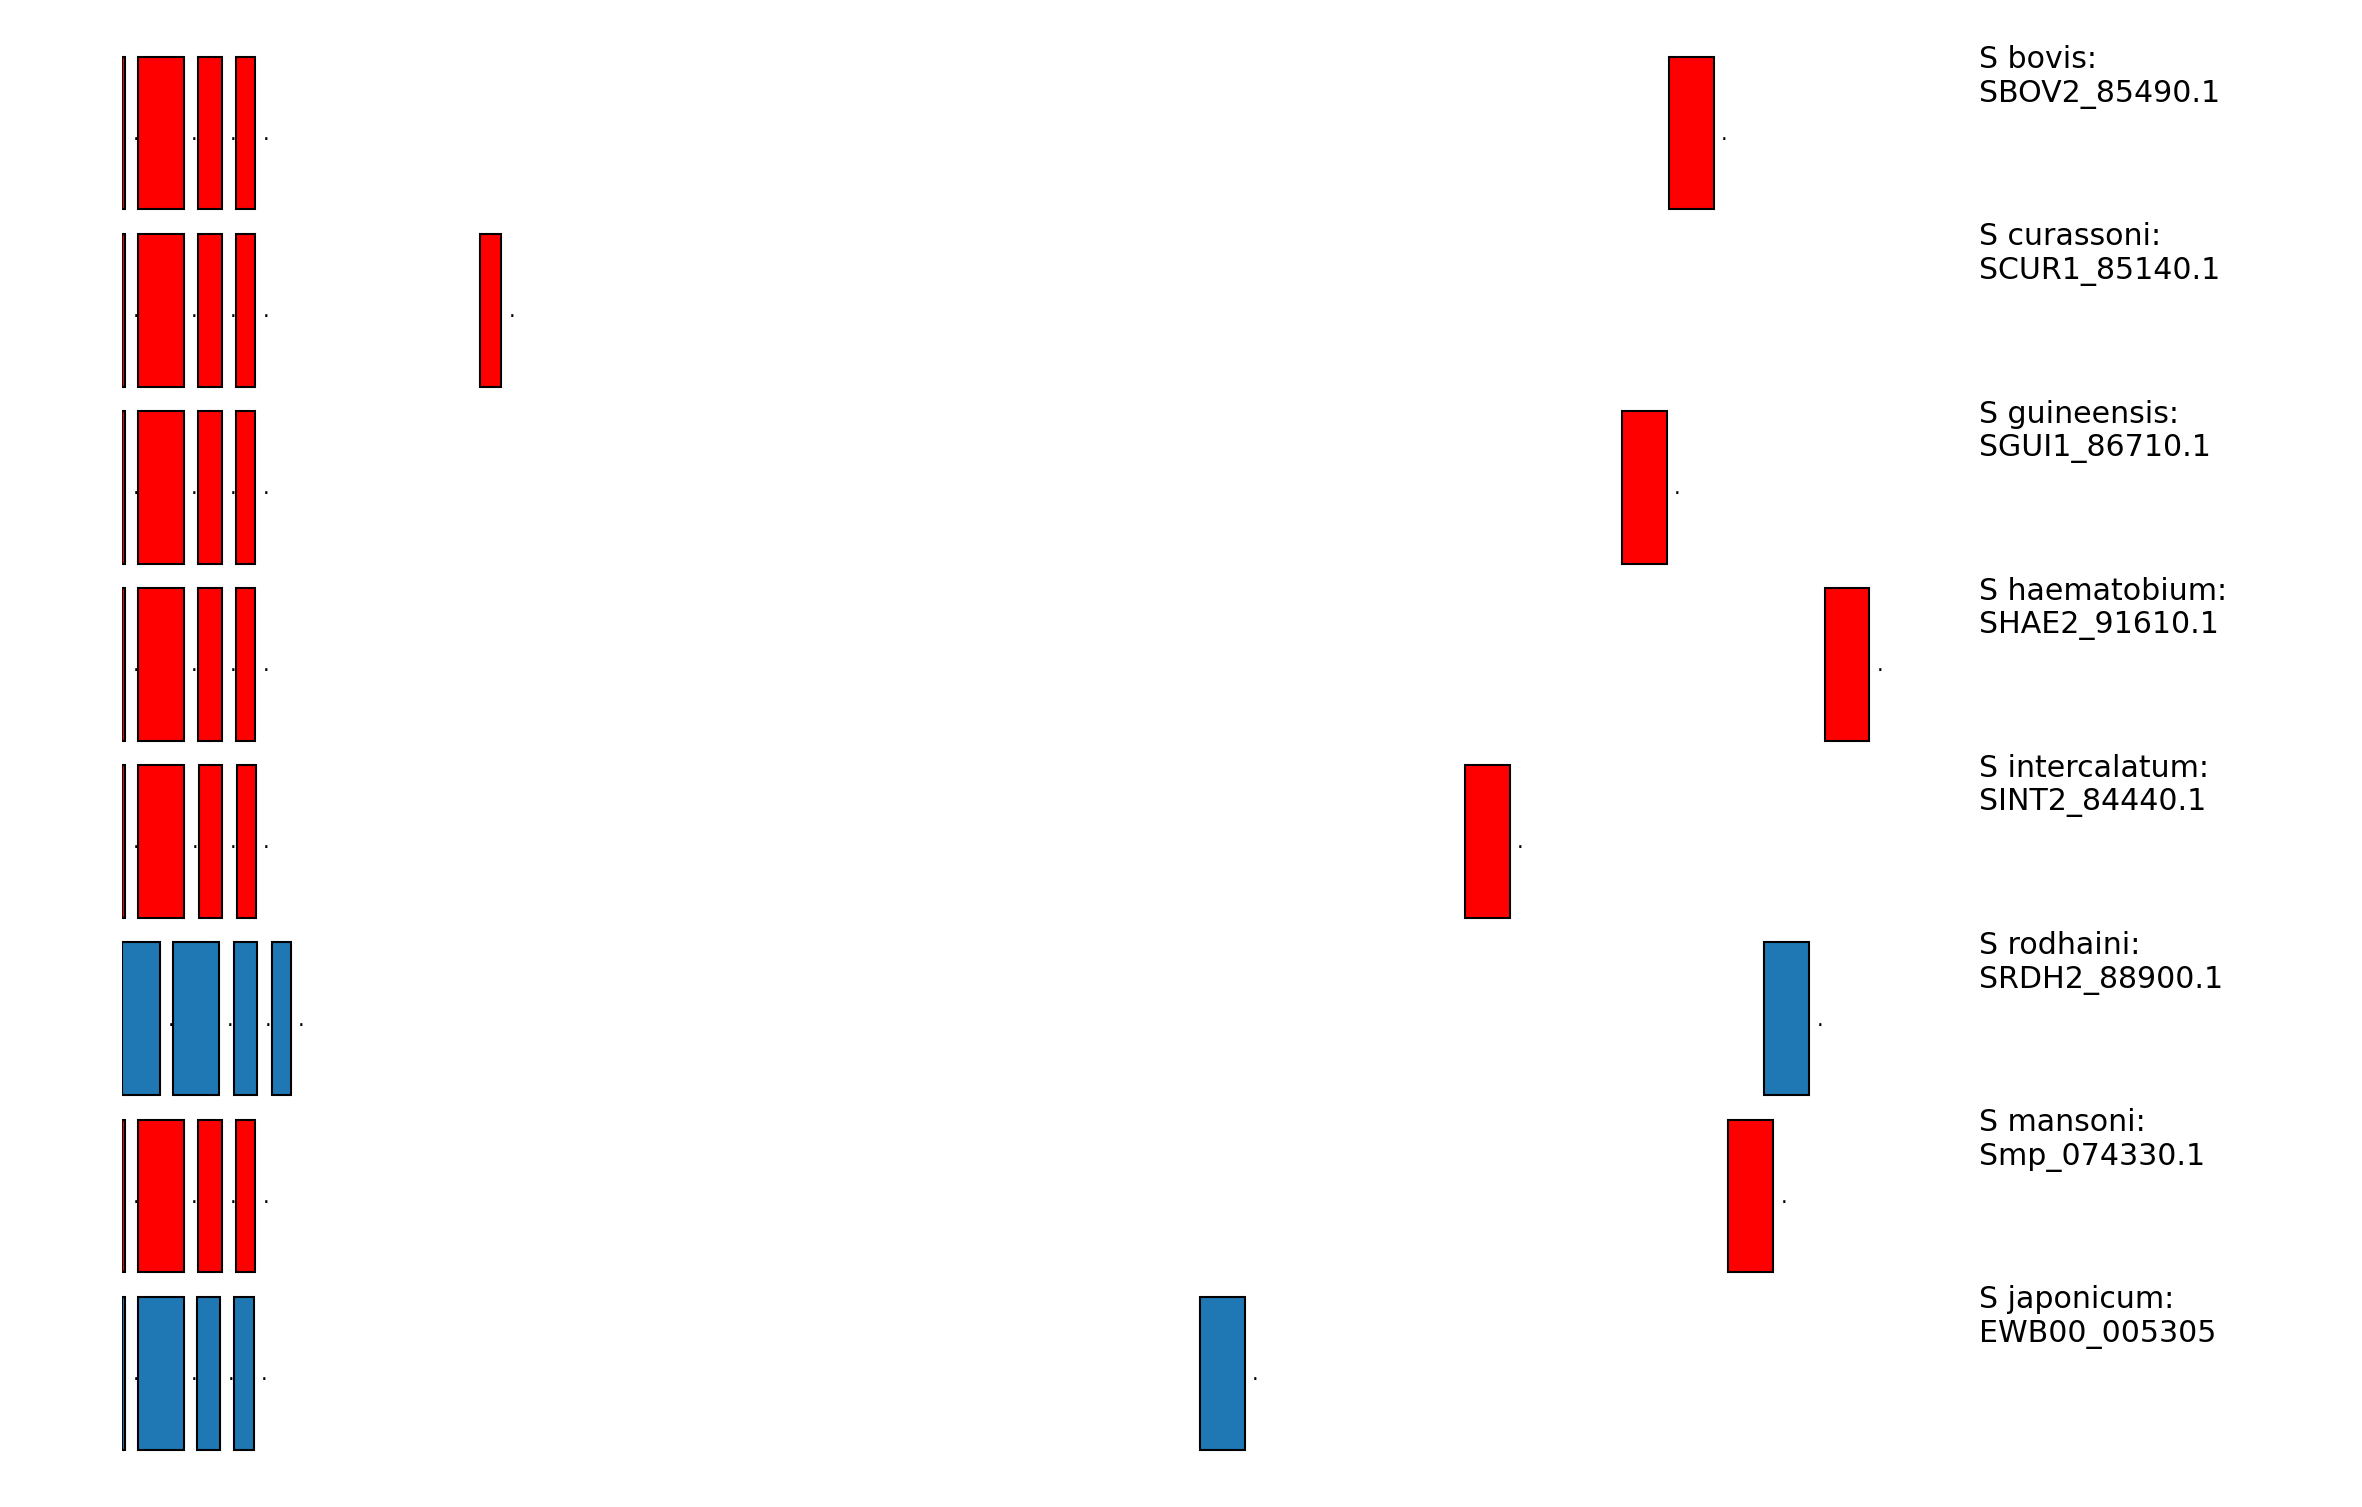

In [41]:
for idx, row in candidates.iterrows():
    clear_output(wait=False)
    hog = row.name
    print(hog)
    print(" - ".join((row["worst_transcript"], str(row["align_pident"]), str(row["blast_pident"]))))
    print(row["worst_pair"])
    print("prot length deviation: " + "%+d" % round(row["prot_lengt_dev_pc"]) + "%")
    print("exon count deviation: " + "%+d" % row["exon_count_dev"])
    display(Image(f"plots/Results_May10/{hog}.png", width=600))
    print()

/tmp/ipykernel_117176/665755333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["pident_diff"] = (test_df["blast_pident"] - test_df["align_pident"]).abs()


Text(0.5, 1.0, 'r = 0.76')

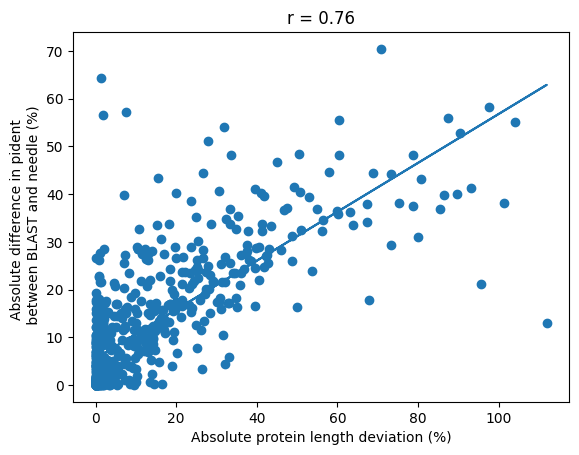

In [85]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
# import numpy.ma as ma

test_df = df1[(~df1["align_pident"].isna()) & (~df1["blast_pident"].isna())]
# test_df = candidates
test_df["pident_diff"] = (test_df["blast_pident"] - test_df["align_pident"]).abs()

x = test_df["prot_lengt_dev_pc"].abs().round(2)
y = test_df["pident_diff"].round(2)
coeff = np.corrcoef(x, y)
# coeff = ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y))
b, m = polyfit(x, y, 1)
plt.scatter(x=x, y=y)
plt.plot(x, b + m * x, '-')
plt.xlabel("Absolute protein length deviation (%)")
plt.ylabel("Absolute difference in pident \n between BLAST and needle (%)")
plt.title(f"r = {round(coeff[1][0], 2)}")